In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
matplotlib.style.use('ggplot') 
%pylab inline

df = pd.read_csv("questions.all.subj.csv")

Populating the interactive namespace from numpy and matplotlib


In [4]:
EMOTIONS = ["blank", "anger", "contempt", "disgust", "fear", "happiness", "sadness", "surprise", "overall"]
EMOTIONS_ALTERNATIVE = ["blank", "happiness", "anger", "contempt", "fear", "disgust", "sadness", "surprise", "overall"]

assert set(EMOTIONS) == set(EMOTIONS_ALTERNATIVE), set(EMOTIONS) - set(EMOTIONS_ALTERNATIVE)

df_first = df[:50]
df_first.columns = (["gender", "age"] + 
            ["q{}".format(x) for x in range(1, 28)] + 
              EMOTIONS_ALTERNATIVE)


df_last = df[50:]
df_last.columns = (["gender", "age"] + 
            ["q{}".format(x) for x in range(1, 28)] + 
              EMOTIONS)

df_new = df_first.append(df_last)

assert len(df_new) == len(df)

df_new.to_csv("questions_fixed.csv")


In [5]:
df_new[EMOTIONS].mean().round(2)

anger        62.96
contempt     59.75
disgust      61.98
fear         57.78
happiness    95.43
sadness      57.04
surprise     89.38
overall      69.19
dtype: float64

In [35]:
df_new["row"] = df.index
melted = pd.melt(df_new[EMOTIONS[1:] + ["row"]],id_vars="row", value_name='perc', var_name='emotion')

melted["all_correct"] = (melted.perc > 99.99)

pivoted = melted[["row", "emotion", "all_correct"]].pivot("row", columns='emotion', values="all_correct")

pivoted.sum()[EMOTIONS[1:]]

anger         9
contempt     12
disgust       9
fear          5
happiness    59
sadness       2
surprise     45
overall       0
dtype: int64

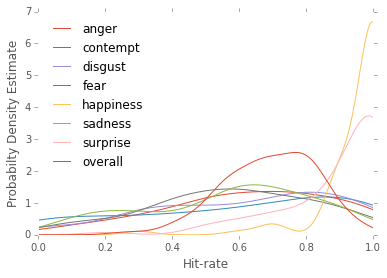

In [55]:
ax = (df_new[EMOTIONS[1:]]/100).plot(kind="kde", xlim=(0, 1))

ax.set_xlabel("Hit-rate")
ax.set_ylabel("Probabilty Density Estimate")

ax.get_figure().savefig('kde.eps', format='svg', dpi=1200)
ax.get_figure().savefig('kde.pdf', format='pdf', dpi=1200)
ax.get_figure().savefig('kde.svg', format='svg', dpi=1200)

